## Adult Salary Project

### Read and Understand the data

In [1]:
adult <- read.csv('adult_sal.csv')
head(adult)

,X,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [2]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [3]:
adult <- select(adult, -X)

In [4]:
str(adult)

'data.frame':	32561 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: chr  "State-gov" "Self-emp-not-inc" "Private" "Private" ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : chr  "Bachelors" "Bachelors" "HS-grad" "11th" ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : chr  "Never-married" "Married-civ-spouse" "Divorced" "Married-civ-spouse" ...
 $ occupation   : chr  "Adm-clerical" "Exec-managerial" "Handlers-cleaners" "Handlers-cleaners" ...
 $ relationship : chr  "Not-in-family" "Husband" "Not-in-family" "Husband" ...
 $ race         : chr  "White" "White" "White" "Black" ...
 $ sex          : chr  "Male" "Male" "Male" "Male" ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 45 50 40 ...
 $ country      : chr  "United-States" "United-States" "U

In [5]:
summary(adult)

      age        type_employer          fnlwgt         education        
 Min.   :17.00   Length:32561       Min.   :  12285   Length:32561      
 1st Qu.:28.00   Class :character   1st Qu.: 117827   Class :character  
 Median :37.00   Mode  :character   Median : 178356   Mode  :character  
 Mean   :38.58                      Mean   : 189778                     
 3rd Qu.:48.00                      3rd Qu.: 237051                     
 Max.   :90.00                      Max.   :1484705                     
 education_num     marital           occupation        relationship      
 Min.   : 1.00   Length:32561       Length:32561       Length:32561      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.08                                                           
 3rd Qu.:12.00                                                           
 Max.   :16.00                               

### Data Cleaning & Feature Engineering

#### type_employer

In [6]:
table(adult$type_employer)


               ?      Federal-gov        Local-gov     Never-worked 
            1836              960             2093                7 
         Private     Self-emp-inc Self-emp-not-inc        State-gov 
           22696             1116             2541             1298 
     Without-pay 
              14 

In [7]:
group_emp <- function(job){
    if (job=='Never-worked' | job=='Without-pay'){
        return('Unemployed')
    }else if(job=='Local-gov' | job=='State-gov'){
        return('SL-gov')
    }else if(job=='Self-emp-inc' | job=='Self-emp-not-inc'){
        return('self-emp')
    }else{
        return(job)
    }
}

adult$type_employer <- sapply(adult$type_employer, group_emp)
    
table(adult$type_employer)


          ? Federal-gov     Private    self-emp      SL-gov  Unemployed 
       1836         960       22696        3657        3391          21 

#### marital

In [8]:
table(adult$marital)


             Divorced     Married-AF-spouse    Married-civ-spouse 
                 4443                    23                 14976 
Married-spouse-absent         Never-married             Separated 
                  418                 10683                  1025 
              Widowed 
                  993 

In [9]:
group_mar <- function(mar){
    if (mar=='Separated' | mar=='Divorced' | mar=='Widowed'){
        return('Not-Married')
    }else if(mar=='Never-married'){
        return(mar)
    }else{
        return('Married')
    }
}

adult$marital <- sapply(adult$marital, group_mar)

table(adult$marital)


      Married Never-married   Not-Married 
        15417         10683          6461 

#### country

In [10]:
table(adult$country)


                         ?                   Cambodia 
                       583                         19 
                    Canada                      China 
                       121                         75 
                  Columbia                       Cuba 
                        59                         95 
        Dominican-Republic                    Ecuador 
                        70                         28 
               El-Salvador                    England 
                       106                         90 
                    France                    Germany 
                        29                        137 
                    Greece                  Guatemala 
                        29                         64 
                     Haiti         Holand-Netherlands 
                        44                          1 
                  Honduras                       Hong 
                        13                         20 
         

In [11]:
Asia <- c('China','Hong','India','Iran','Cambodia','Japan','Laos','Philippines','Vietnam','Taiwan','Thailand')
North.America <- c('Canada','United-States','Puerto-Rico')
Europe <- c('England','France','Germany','Greece','Holand-Netherlands','Hungary','Ireland','Italy','Poland','Portugal','Scotland','Yugoslavia')
Latin.South.America <- c('Columbia','Cuba','Dominican-Republic','Ecuador','El-Salvador','Guatemala','Haiti','Honduras','Mexico','Nicaragua','Outlying-US(Guam-USVI-etc)','Peru','Jamaica','Trinadad&Tobago')
Other <- c('South')

group_cty <- function(cty){
    if (cty %in% Asia){
        return('Asia')
    }else if(cty %in% Europe){
        return('Europe')
    }else if(cty %in% North.America){
        return('North.America')
    }else if(cty %in% Latin.South.America){
        return('Latin.South.America')
    }else{
        return('Other')
    }
}
        
adult$country <- sapply(adult$country, group_cty)
    
table(adult$country)


               Asia              Europe Latin.South.America       North.America 
                671                 521                1301               29405 
              Other 
                663 

In [12]:
str(adult)

'data.frame':	32561 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: chr  "SL-gov" "self-emp" "Private" "Private" ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : chr  "Bachelors" "Bachelors" "HS-grad" "11th" ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : chr  "Never-married" "Married" "Not-Married" "Married" ...
 $ occupation   : chr  "Adm-clerical" "Exec-managerial" "Handlers-cleaners" "Handlers-cleaners" ...
 $ relationship : chr  "Not-in-family" "Husband" "Not-in-family" "Husband" ...
 $ race         : chr  "White" "White" "White" "Black" ...
 $ sex          : chr  "Male" "Male" "Male" "Male" ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 45 50 40 ...
 $ country      : chr  "North.America" "North.America" "North.America" "North.America" 

#### education

In [13]:
table(adult$education)


        10th         11th         12th      1st-4th      5th-6th      7th-8th 
         933         1175          433          168          333          646 
         9th   Assoc-acdm    Assoc-voc    Bachelors    Doctorate      HS-grad 
         514         1067         1382         5355          413        10501 
     Masters    Preschool  Prof-school Some-college 
        1723           51          576         7291 

In [14]:
group_edu <- function(edu){
    if (edu=='12th' | edu=='11th' | edu=='10th' | edu=='9th' | edu=='7th-8th' | edu=='5th-6th' | edu=='1st-4th' | edu=='Preschool'){
        return('Not-HS-Grad')
    }else if(edu=='Assoc-acdm' | edu=='Assoc-voc' | edu=='Some-college' | edu=='Prof-school'){
        return('Post-HS-Grad')
    }else{
        return(edu)
    }
}

adult$education <- sapply(adult$education, group_edu)

table(adult$education)


   Bachelors    Doctorate      HS-grad      Masters  Not-HS-Grad Post-HS-Grad 
        5355          413        10501         1723         4253        10316 

#### occupation

In [15]:
table(adult$occupation)


                ?      Adm-clerical      Armed-Forces      Craft-repair 
             1843              3770                 9              4099 
  Exec-managerial   Farming-fishing Handlers-cleaners Machine-op-inspct 
             4066               994              1370              2002 
    Other-service   Priv-house-serv    Prof-specialty   Protective-serv 
             3295               149              4140               649 
            Sales      Tech-support  Transport-moving 
             3650               928              1597 

In [16]:
group_occ <- function(occ){
    if(occ=='Handlers-cleaners' | occ=='Machine-op-inspct' | occ=='Craft-repair'){
        return('maintain-serv')
    }else if(occ=='Protective-serv' | occ=='Armed-Forces'){
        return('protect-serv')
    }else{
        return(occ)
    }
}

adult$occupation <- sapply(adult$occupation, group_occ)

table(adult$occupation)


               ?     Adm-clerical  Exec-managerial  Farming-fishing 
            1843             3770             4066              994 
   maintain-serv    Other-service  Priv-house-serv   Prof-specialty 
            7471             3295              149             4140 
    protect-serv            Sales     Tech-support Transport-moving 
             658             3650              928             1597 

### Dealing with Missing Values

In [17]:
library(Amelia)

Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.7.6, built: 2019-11-24)
## Copyright (C) 2005-2020 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



In [18]:
adult[adult=='?'] <- NA

In [19]:
adult$type_employer <- as.factor(adult$type_employer)
adult$education <- as.factor(adult$education)
adult$marital <- as.factor(adult$marital)
adult$relationship <- as.factor(adult$relationship)
adult$race <- as.factor(adult$race)
adult$country <- as.factor(adult$country)
adult$income <- as.factor(adult$income)
adult$occupation <- as.factor(adult$occupation)
adult$sex <- as.factor(adult$sex)

str(adult)

'data.frame':	32561 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: Factor w/ 5 levels "Federal-gov",..: 4 3 2 2 2 2 2 3 2 2 ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : Factor w/ 6 levels "Bachelors","Doctorate",..: 1 1 3 5 1 4 5 3 4 1 ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : Factor w/ 3 levels "Married","Never-married",..: 2 1 3 1 1 1 1 1 2 1 ...
 $ occupation   : Factor w/ 11 levels "Adm-clerical",..: 1 2 4 4 7 2 5 2 7 2 ...
 $ relationship : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 45 50 40 .

In [20]:
table(adult$type_employer)


Federal-gov     Private    self-emp      SL-gov  Unemployed 
        960       22696        3657        3391          21 

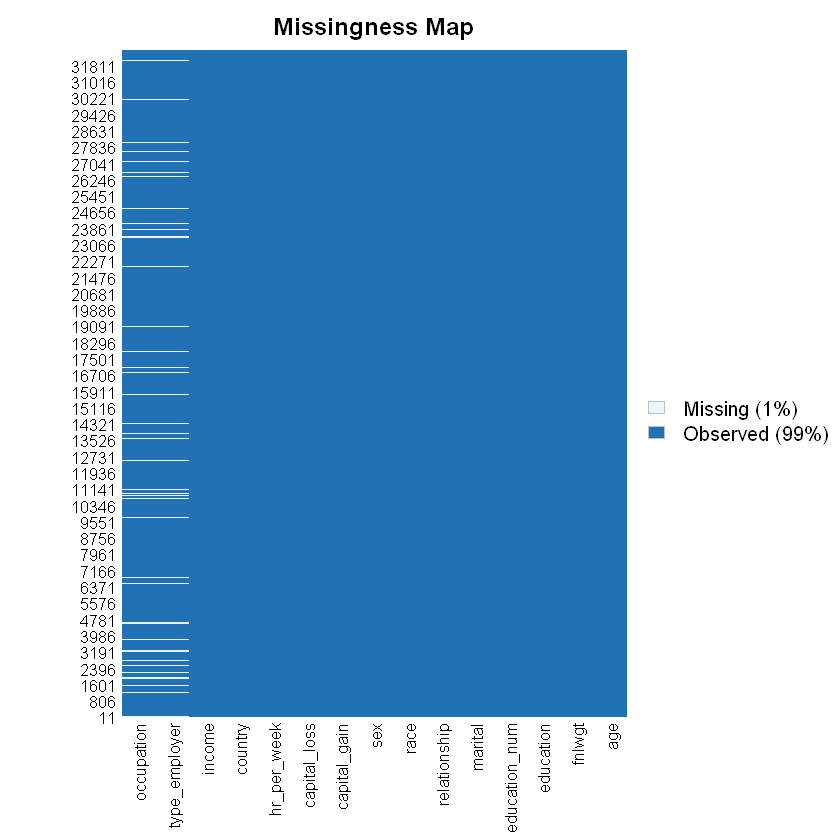

In [21]:
missmap(adult)

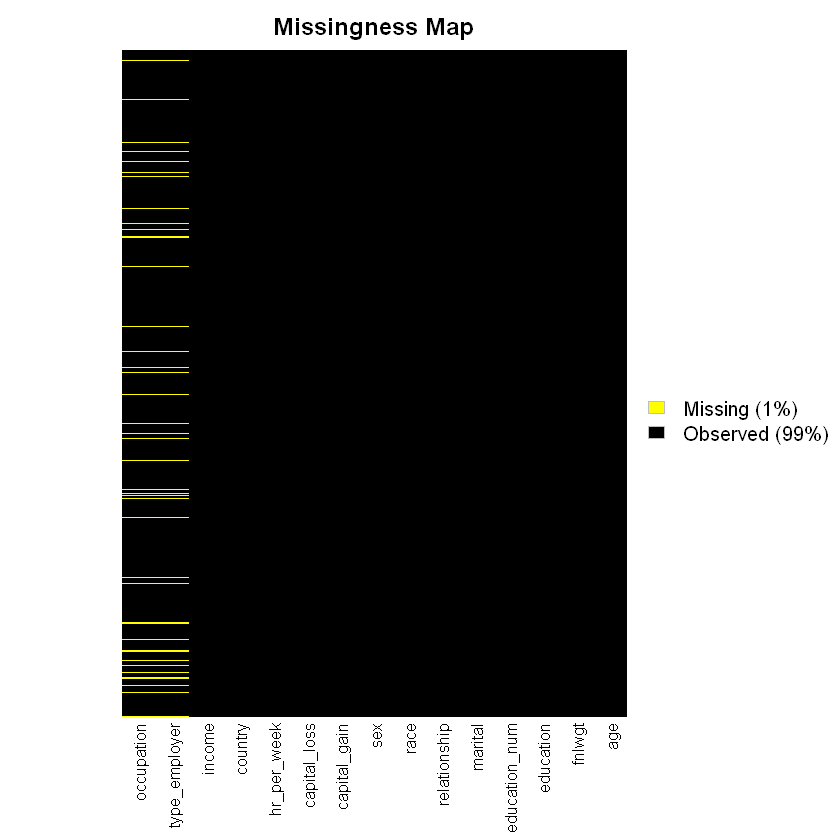

In [22]:
missmap(adult, y.at=c(1),y.labels=c(''),col=c('yellow','black'))

#### Drop missing data

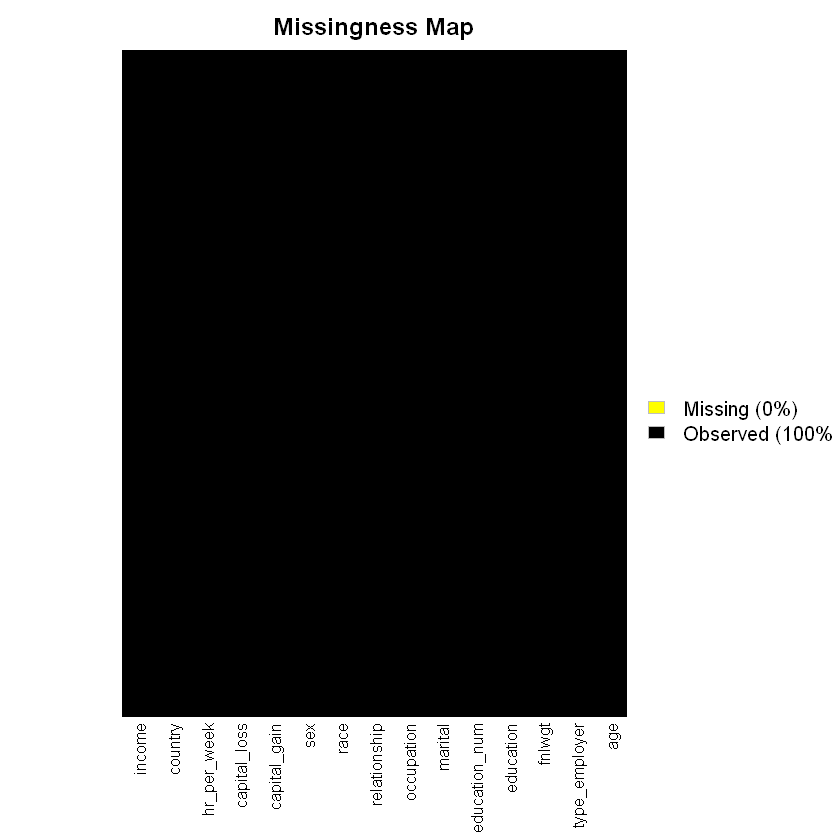

In [23]:
adult <- na.omit(adult)

missmap(adult, y.at=c(1),y.labels=c(''),col=c('yellow','black'))

### Exploratory Data Analysis

In [24]:
str(adult)

'data.frame':	30718 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: Factor w/ 5 levels "Federal-gov",..: 4 3 2 2 2 2 2 3 2 2 ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : Factor w/ 6 levels "Bachelors","Doctorate",..: 1 1 3 5 1 4 5 3 4 1 ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : Factor w/ 3 levels "Married","Never-married",..: 2 1 3 1 1 1 1 1 2 1 ...
 $ occupation   : Factor w/ 11 levels "Adm-clerical",..: 1 2 4 4 7 2 5 2 7 2 ...
 $ relationship : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 45 50 40 .

In [25]:
library(ggplot2)
library(dplyr)

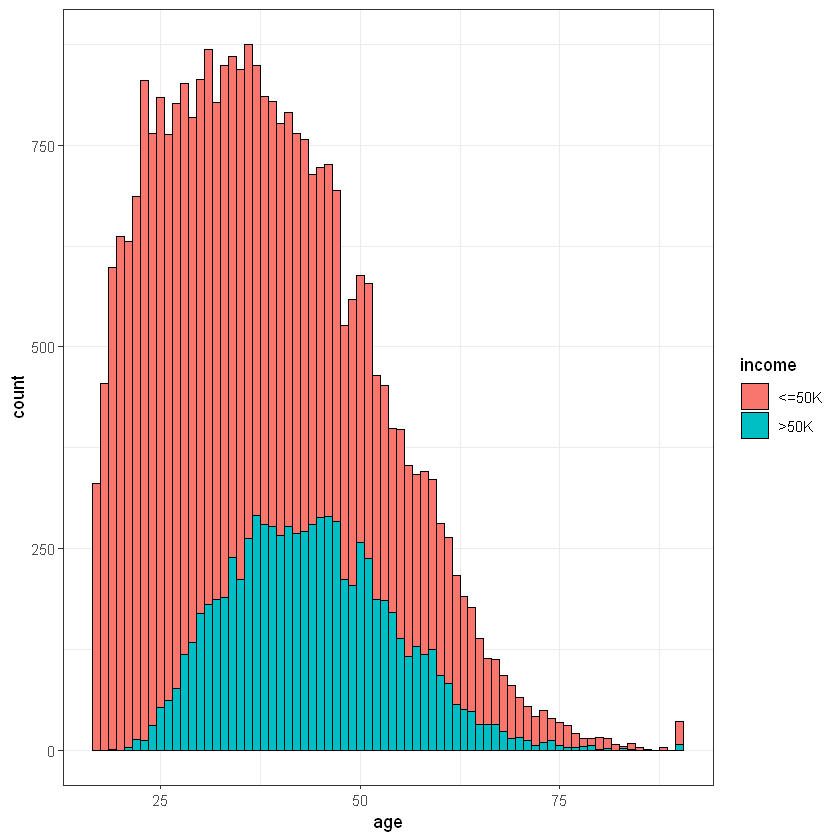

In [26]:
ggplot(adult,aes(age)) + geom_histogram(aes(fill=income),color='black',binwidth=1) + theme_bw()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



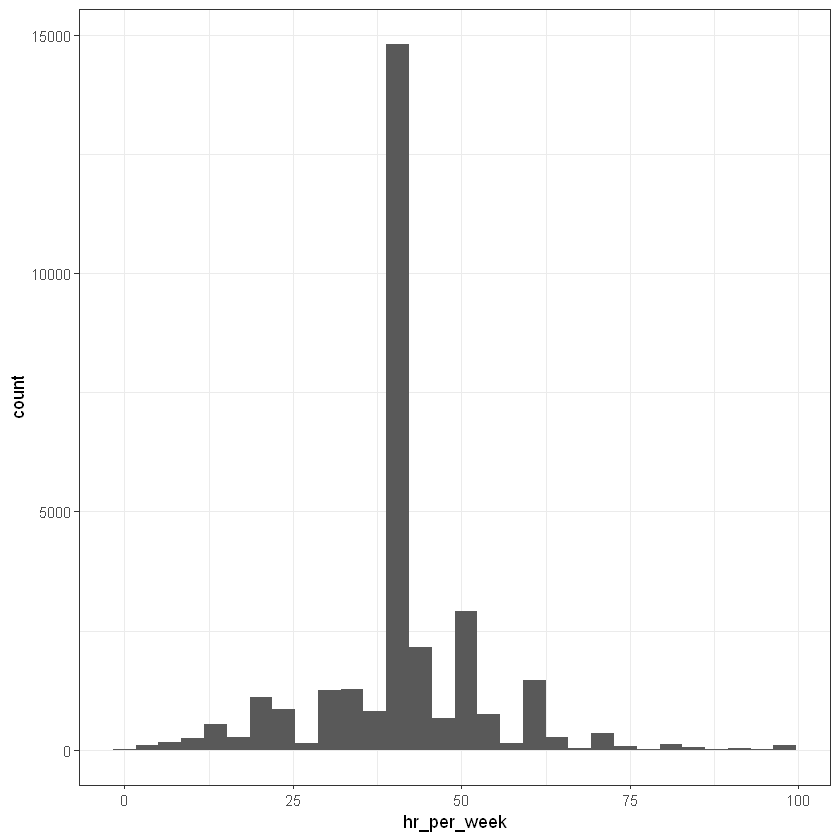

In [27]:
ggplot(adult, aes(hr_per_week)) + geom_histogram() + theme_bw()

In [28]:
head(adult)

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
1,39,SL-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,North.America,<=50K
2,50,self-emp,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,North.America,<=50K
3,38,Private,215646,HS-grad,9,Not-Married,maintain-serv,Not-in-family,White,Male,0,0,40,North.America,<=50K
4,53,Private,234721,Not-HS-Grad,7,Married,maintain-serv,Husband,Black,Male,0,0,40,North.America,<=50K
5,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Latin.South.America,<=50K
6,37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,North.America,<=50K


#### Renaming country column

In [29]:
adult <- rename(adult, region = country)
head(adult)

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,region,income
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
1,39,SL-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,North.America,<=50K
2,50,self-emp,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,North.America,<=50K
3,38,Private,215646,HS-grad,9,Not-Married,maintain-serv,Not-in-family,White,Male,0,0,40,North.America,<=50K
4,53,Private,234721,Not-HS-Grad,7,Married,maintain-serv,Husband,Black,Male,0,0,40,North.America,<=50K
5,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Latin.South.America,<=50K
6,37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,North.America,<=50K


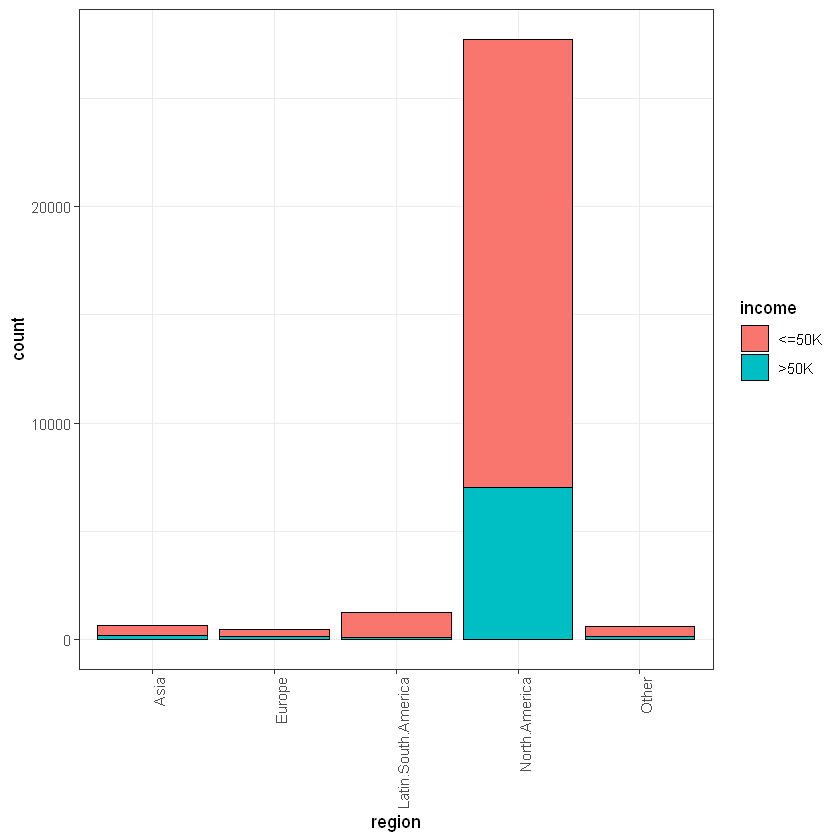

In [30]:
pl1 <- ggplot(adult, aes(region)) + geom_bar(aes(fill=income), color='black') + theme_bw()
pl2 <- pl1 + theme(axis.text.x = element_text(angle = 90, hjust = 1))
pl2

### Model building

In [31]:
str(adult)

'data.frame':	30718 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: Factor w/ 5 levels "Federal-gov",..: 4 3 2 2 2 2 2 3 2 2 ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : Factor w/ 6 levels "Bachelors","Doctorate",..: 1 1 3 5 1 4 5 3 4 1 ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : Factor w/ 3 levels "Married","Never-married",..: 2 1 3 1 1 1 1 1 2 1 ...
 $ occupation   : Factor w/ 11 levels "Adm-clerical",..: 1 2 4 4 7 2 5 2 7 2 ...
 $ relationship : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 45 50 40 .

#### Train test split

In [32]:
library(caTools)

In [33]:
set.seed(101)

sample <- sample.split(adult$income,SplitRatio=0.7)

train <- subset(adult, sample==T)
test <- subset(adult, sample==F)

In [34]:
model <- glm(income ~., family=binomial(link ='logit'), data=train)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [35]:
summary(model)


Call:
glm(formula = income ~ ., family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.0617  -0.5255  -0.2000  -0.0080   3.6211  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -6.691e+00  5.168e-01 -12.946  < 2e-16 ***
age                         2.615e-02  1.994e-03  13.112  < 2e-16 ***
type_employerPrivate       -4.352e-01  1.121e-01  -3.882 0.000103 ***
type_employerself-emp      -6.304e-01  1.239e-01  -5.088 3.62e-07 ***
type_employerSL-gov        -6.734e-01  1.261e-01  -5.341 9.22e-08 ***
type_employerUnemployed    -1.219e+01  1.348e+02  -0.090 0.927957    
fnlwgt                      5.352e-07  2.078e-07   2.576 0.009995 ** 
educationDoctorate          1.043e-01  1.982e-01   0.526 0.598765    
educationHS-grad           -1.939e-01  1.191e-01  -1.628 0.103468    
educationMasters            8.767e-02  9.481e-02   0.925 0.355146    
educationNot-H

In [36]:
new.step.model <- step(model)

Start:  AIC=14159.56
income ~ age + type_employer + fnlwgt + education + education_num + 
    marital + occupation + relationship + race + sex + capital_gain + 
    capital_loss + hr_per_week + region



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                Df Deviance   AIC
- education      5    14079 14153
<none>                14076 14160
- fnlwgt         1    14082 14164
- race           4    14092 14168
- region         4    14098 14174
- type_employer  4    14118 14194
- marital        2    14129 14209
- education_num  1    14162 14244
- sex            1    14169 14251
- age            1    14249 14331
- capital_loss   1    14292 14374
- hr_per_week    1    14304 14386
- relationship   5    14360 14434
- occupation    10    14488 14552
- capital_gain   1    15322 15404


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=14152.98
income ~ age + type_employer + fnlwgt + education_num + marital + 
    occupation + relationship + race + sex + capital_gain + capital_loss + 
    hr_per_week + region



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                Df Deviance   AIC
<none>                14079 14153
- fnlwgt         1    14086 14158
- race           4    14096 14162
- region         4    14101 14167
- type_employer  4    14121 14187
- marital        2    14132 14202
- sex            1    14172 14244
- age            1    14256 14328
- capital_loss   1    14295 14367
- hr_per_week    1    14307 14379
- relationship   5    14363 14427
- occupation    10    14500 14554
- education_num  1    14763 14835
- capital_gain   1    15324 15396


In [37]:
summary(new.step.model)


Call:
glm(formula = income ~ age + type_employer + fnlwgt + education_num + 
    marital + occupation + relationship + race + sex + capital_gain + 
    capital_loss + hr_per_week + region, family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.0509  -0.5249  -0.2003  -0.0080   3.6526  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -7.207e+00  4.093e-01 -17.608  < 2e-16 ***
age                         2.620e-02  1.978e-03  13.241  < 2e-16 ***
type_employerPrivate       -4.381e-01  1.120e-01  -3.913 9.13e-05 ***
type_employerself-emp      -6.402e-01  1.237e-01  -5.174 2.29e-07 ***
type_employerSL-gov        -6.680e-01  1.257e-01  -5.315 1.07e-07 ***
type_employerUnemployed    -1.220e+01  1.342e+02  -0.091  0.92761    
fnlwgt                      5.347e-07  2.077e-07   2.575  0.01003 *  
education_num               2.817e-01  1.134e-02  24.852  < 2e-16 *

In [38]:
test$predicted.income <- predict(model, newdata = test, type='response')

#### Confusion Matrix

In [39]:
table(test$income, test$predicted.income > 0.5)

       
        FALSE TRUE
  <=50K  6371  549
  >50K    870 1425

#### Accuracy

In [40]:
acc <- (6371+1425)/(6371+1425+870+549)
acc

[1] 0.8460119

#### Recall

In [41]:
6371/(6371+549)

[1] 0.9206647

#### Precision

In [42]:
6371/(6371+870)

[1] 0.8798508

#### with step model

In [43]:
test$predicted.income2 <- predict(new.step.model, newdata = test, type='response')

In [44]:
table(test$income, test$predicted.income2 > 0.5)

       
        FALSE TRUE
  <=50K  6375  545
  >50K    872 1423

## END!!!